In [22]:
import locmofitpy2
import pandas as pd

locs_df = pd.read_csv("data/simulated_data_spcap.csv")
locs = locs_df.values[:, 0:3]
stddev = locs_df.values[:, 3:]

In [ ]:
# %%timeit
res = locmofitpy2.run_locmofit(
    "SphericalCap",
    locs,
    stddev,
    init_params={"c": 0.02},
    freeze=(),
    max_iter=200,
    tol=1e-6,
)

In [24]:
print(res["losses"][-1], res["losses"].shape[0])

201.38875 200


In [25]:
res["parameters"]

{'alpha': nan,
 'c': nan,
 'phi': nan,
 'theta': nan,
 'x': nan,
 'y': nan,
 'z': nan}

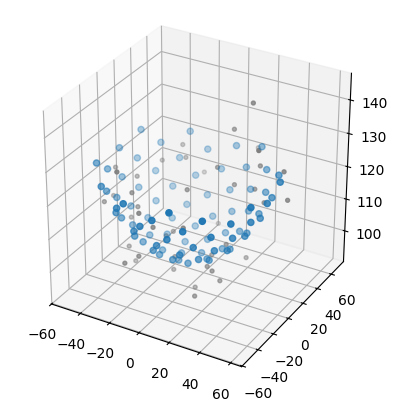

In [26]:
import numpy as np
import matplotlib.pyplot as plt

ground_truth = pd.read_csv("data/ground_truth_spcap.csv")

positions = np.array(res["model_points"])  # converts JAX array -> NumPy array on host

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.scatter(locs_df["x"], locs_df["y"], locs_df["z"], c="gray", s=8)  # type: ignore[arg-type]
ax.scatter(ground_truth["x"], ground_truth["y"], ground_truth["z"])  # type: ignore[arg-type]
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])  # type: ignore[arg-type]

plt.show()
